<a href="https://colab.research.google.com/github/dhivya4/Inceptez_Batch19/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
 

In [5]:
from google.colab import files
uploaded = files.upload()


Saving sample_submission_M0L0uXE.csv to sample_submission_M0L0uXE.csv
Saving train_LZdllcl.csv to train_LZdllcl.csv
Saving test_2umaH9m.csv to test_2umaH9m.csv


In [97]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train_LZdllcl.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_2umaH9m.csv']))
submisssion = pd.read_csv(io.BytesIO(uploaded['sample_submission_M0L0uXE.csv']))


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
train.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [11]:
train.select_dtypes(exclude='object')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0
54804,74592,1,37,2.0,6,0,0,56,0
54805,13918,1,27,5.0,3,1,0,79,0
54806,13614,1,29,1.0,2,0,0,45,0


In [12]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [13]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [14]:
test.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77


In [15]:
test.shape

(23490, 13)

In [16]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [17]:
train.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [18]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
train.duplicated().sum()

0

In [20]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [21]:
36669 +14925+805, train.shape[0], train['education'].isna().sum()

(52399, 54808, 2409)

In [22]:
train['education'].value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [23]:
train['education'].value_counts(dropna=False, normalize=True)*100

Bachelor's          66.904467
Master's & above    27.231426
NaN                  4.395344
Below Secondary      1.468764
Name: education, dtype: float64

In [24]:
train['previous_year_rating'].value_counts(dropna=False,normalize=True)*100

3.0    33.969494
5.0    21.422055
4.0    18.021092
1.0    11.354182
2.0     7.708729
NaN     7.524449
Name: previous_year_rating, dtype: float64

In [25]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [26]:
test[test['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.0,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.0,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.0,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,NaN,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,14036,Sales & Marketing,region_7,NaN,m,other,6,26,3.0,3,0,0,48
23424,5890,Analytics,region_15,NaN,m,sourcing,1,34,3.0,5,0,0,87
23452,65429,Analytics,region_15,NaN,m,sourcing,1,30,2.0,7,0,0,83
23459,30477,Sales & Marketing,region_22,NaN,m,other,1,31,2.0,7,0,0,52


In [27]:
test[test['education'].isna()==False]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [28]:
test[test['education']!='NaN']

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [29]:
test[test['education'].notna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [30]:
data=pd.concat([train,test])

train.shape, test.shape, data.shape

((54808, 14), (23490, 13), (78298, 14))

In [31]:
display(train.head(1), train.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [32]:
display(test.head(1), test.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [33]:
data.reset_index(inplace=True, drop=True)
display(data.head(1), data.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [34]:
train.shape[0], test.shape[0], train.shape[0]+test.shape[0], data.shape[0]

(54808, 23490, 78298, 78298)

In [35]:
data['is_promoted'].value_counts(dropna=False)

0.0    50140
NaN    23490
1.0     4668
Name: is_promoted, dtype: int64

In [36]:
data['is_promoted'].notna().sum()

54808

In [37]:
data['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [38]:
data['education'].value_counts(dropna=False,normalize=True)*100

Bachelor's          66.728397
Master's & above    27.368515
NaN                  4.397303
Below Secondary      1.505786
Name: education, dtype: float64

In [39]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [40]:
data[data['previous_year_rating'].isna()]['length_of_service'].unique()

array([1])

In [41]:
data[data['previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0.0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0.0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0.0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0.0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78214,53291,Operations,region_4,Bachelor's,m,sourcing,1,32,NaN,1,1,0,62,NaN
78244,10138,Technology,region_2,Bachelor's,f,referred,1,29,NaN,1,0,0,79,NaN
78253,65765,Analytics,region_31,Bachelor's,m,sourcing,3,28,NaN,1,0,0,86,NaN
78287,39410,Sales & Marketing,region_2,Bachelor's,m,other,3,20,NaN,1,0,0,49,NaN


In [42]:
data['previous_year_rating'].fillna(0,inplace=True)

In [43]:
data['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
0.0     5936
Name: previous_year_rating, dtype: int64

In [44]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [45]:
data.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
78293,Legal,region_2,Below Secondary,m,sourcing
78294,Technology,region_25,Bachelor's,m,sourcing
78295,HR,region_16,Bachelor's,f,sourcing
78296,Procurement,region_31,Bachelor's,m,sourcing


In [46]:
[print(i, data[i].unique()) for i in data.select_dtypes(include='object').columns]

department ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender ['f' 'm']
recruitment_channel ['sourcing' 'other' 'referred']


[None, None, None, None, None]

In [47]:
data['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [48]:
for i in data.select_dtypes(include='object').columns:
    print(i)

department
region
education
gender
recruitment_channel


In [49]:
data['gender'] = data['gender'].replace({'f':0,'m':1})

In [50]:
data['gender'].unique()

array([0, 1])

In [51]:
data.select_dtypes(include='object').columns


Index(['department', 'region', 'education', 'recruitment_channel'], dtype='object')

In [52]:
encoded_data = pd.get_dummies(data, columns=['department', 'region', 'education', 'recruitment_channel'])
print(encoded_data.shape)
encoded_data.head(2)

(78298, 59)


,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,0,0,0,0,1,0,0,1,0,0


In [53]:
encoded_data.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
    

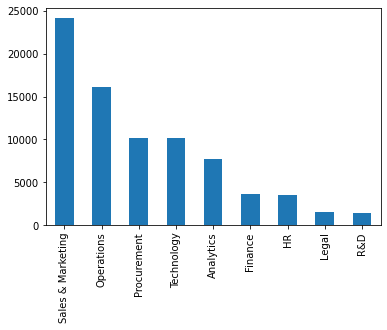

In [54]:
#univariate analysis
data['department'].value_counts().plot(kind='bar')

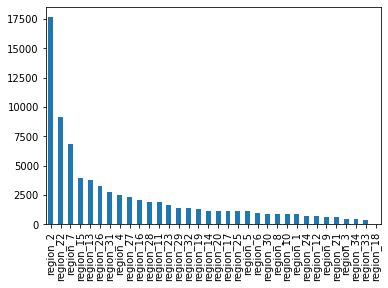

In [55]:
data['region'].value_counts().plot(kind='bar')

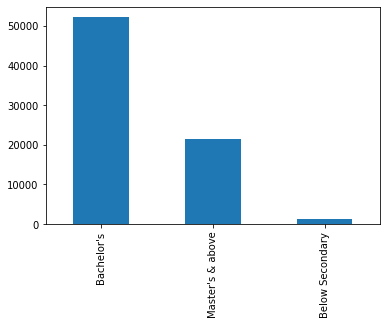

In [56]:
data['education'].value_counts().plot(kind='bar')

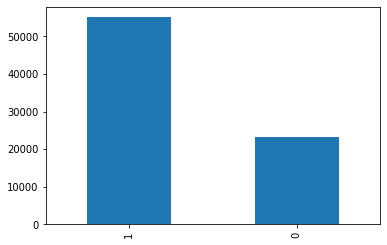

In [58]:
data['gender'].value_counts().plot(kind='bar')

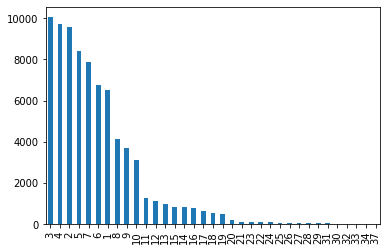

In [57]:
data['length_of_service'].value_counts().plot(kind='bar')

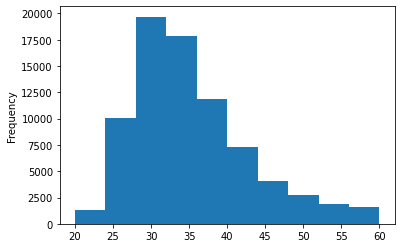

In [59]:
data['age'].plot(kind='hist')

In [60]:
data['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

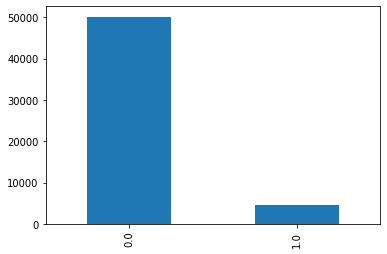

In [61]:
data['is_promoted'].value_counts().plot(kind='bar')

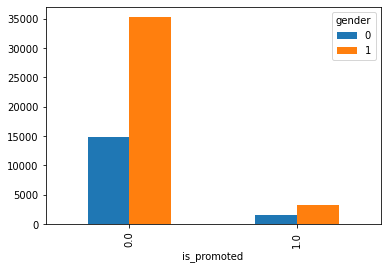

In [62]:
#bivariate analysis
pd.crosstab(data['is_promoted'],data['gender']).plot(kind='bar')

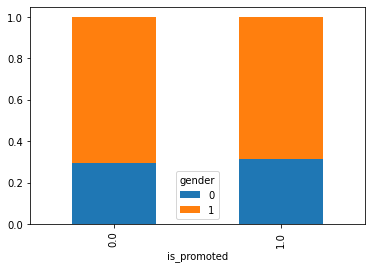

In [63]:
gender = pd.crosstab(data['is_promoted'],data['gender'])
gender.div(gender.sum(1),axis=0).plot(kind='bar',stacked=True)

In [64]:
def bivariate_percent_plt(x,y):
    cross = pd.crosstab(x,y)
    cross.div(cross.sum(1),axis=0).plot(kind='bar',stacked=True)

In [65]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

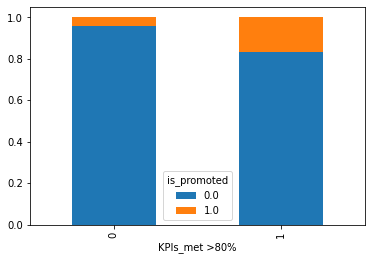

In [66]:
bivariate_percent_plt(data['KPIs_met >80%'],data['is_promoted'])

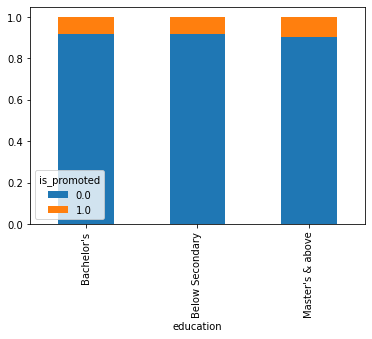

In [67]:
bivariate_percent_plt(data['education'],data['is_promoted'])

In [68]:
data.drop(columns=['employee_id']).corr()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
gender,1.000000,0.084530,-0.017816,-0.024587,-0.017800,-0.037916,0.000553,-0.024840,-0.011109
no_of_trainings,0.084530,1.000000,-0.082536,-0.062046,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,-0.017816,-0.082536,1.000000,0.181352,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,-0.024587,-0.062046,0.181352,1.000000,0.193161,0.273625,0.021647,0.055040,0.125991
length_of_service,-0.017800,-0.058403,0.653339,0.193161,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,-0.037916,-0.043912,-0.026223,0.273625,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.000553,-0.004818,-0.007357,0.021647,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.024840,0.044180,-0.044592,0.055040,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,-0.011109,-0.024896,-0.017166,0.125991,-0.010670,0.221582,0.195871,0.181147,1.000000


In [69]:
data[['gender','is_promoted']].corr()

,gender,is_promoted
gender,1.000000,-0.011109
is_promoted,-0.011109,1.000000


In [70]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

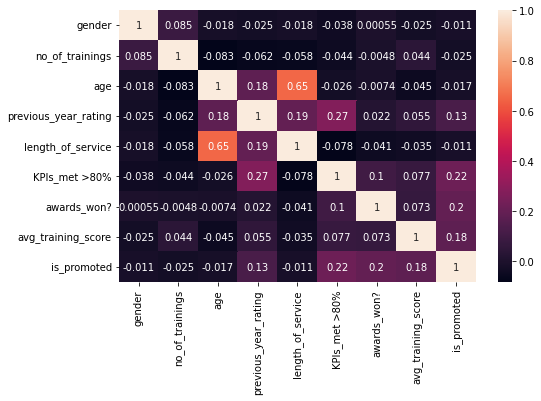

In [71]:
plt.figure(figsize=(8,5))
sns.heatmap(data.drop(columns=['employee_id']).corr(),annot=True)

In [72]:
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0


In [73]:
data.drop(columns=['employee_id']).describe().T

,count,mean,std,min,25%,50%,75%,max
gender,78298.0,0.703620,0.456664,0.0,0.0,1.0,1.0,1.0
no_of_trainings,78298.0,1.253378,0.606766,1.0,1.0,1.0,1.0,10.0
age,78298.0,34.797619,7.665928,20.0,29.0,33.0,39.0,60.0
previous_year_rating,78298.0,3.079593,1.499173,0.0,2.0,3.0,4.0,5.0
length_of_service,78298.0,5.848974,4.248070,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,78298.0,0.354032,0.478222,0.0,0.0,0.0,1.0,1.0
awards_won?,78298.0,0.023053,0.150073,0.0,0.0,0.0,0.0,1.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [74]:
encoded_data.select_dtypes(exclude='object').columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
    

In [75]:
mmsc = MinMaxScaler()
scaled_data = mmsc.fit_transform(encoded_data[['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score']])
scaled_data = pd.DataFrame(scaled_data, columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])
print(scaled_data.shape)
scaled_data.head(3)

(78298, 7)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.375,1.0,0.194444,1.0,0.0,0.166667
1,0.0,0.250,1.0,0.083333,0.0,0.0,0.350000
2,0.0,0.350,0.6,0.166667,0.0,0.0,0.183333


In [76]:
preprocessed_data = pd.concat([scaled_data, encoded_data.drop(columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])],axis=1)
preprocessed_data.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,0,0.0,...,0,1,0,0,0,0,1,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,1,0.0,...,0,0,0,0,1,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,1,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,1,0.0,...,0,0,0,0,1,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,1,0.0,...,0,0,0,0,1,0,0,1,0,0


In [77]:
display(preprocessed_data.head(1), preprocessed_data.tail(1))

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,0,0.0,...,0,1,0,0,0,0,1,0,0,1


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
78297,0.222222,0.5,1.0,0.111111,1.0,0.0,0.833333,5973,1,NaN,...,0,0,0,0,0,0,1,1,0,0


In [78]:
encoded_data

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0.0,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0.0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,1,1,24,3.0,1,0,0,61,NaN,...,0,0,0,0,0,1,0,0,0,1
78294,25600,1,1,31,3.0,7,0,0,74,NaN,...,0,0,0,0,1,0,0,0,0,1
78295,45409,0,1,26,4.0,4,0,0,50,NaN,...,0,0,0,0,1,0,0,0,0,1
78296,1186,1,3,27,0.0,1,0,0,70,NaN,...,0,0,0,0,1,0,0,0,0,1


In [79]:
preprc_train = preprocessed_data[preprocessed_data['is_promoted'].notna()]
preprc_test = preprocessed_data[preprocessed_data['is_promoted'].isna()]

In [80]:
preprc_train.to_csv('preprocessed_train_data.csv',index=False)
preprc_test.to_csv('preprocessed_test_data.csv',index=False)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [82]:
pptrain = pd.read_csv('preprocessed_train_data.csv')

In [83]:
pptrain

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,0,0.0,...,0,1,0,0,0,0,1,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,1,0.0,...,0,0,0,0,1,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,1,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,1,0.0,...,0,0,0,0,1,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,1,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.000000,0.700,0.6,0.444444,0.0,0.0,0.650000,3030,1,0.0,...,0,0,0,0,1,0,0,0,0,1
54804,0.000000,0.425,0.4,0.138889,0.0,0.0,0.283333,74592,0,0.0,...,0,0,0,0,0,0,1,1,0,0
54805,0.000000,0.175,1.0,0.055556,1.0,0.0,0.666667,13918,1,0.0,...,0,0,0,0,1,0,0,1,0,0
54806,0.000000,0.225,0.2,0.027778,0.0,0.0,0.100000,13614,1,0.0,...,0,0,0,1,0,0,0,0,0,1


In [84]:
X = pptrain.drop(columns=['employee_id','is_promoted'])
y = pptrain['is_promoted']

In [85]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((43846, 57), (10962, 57), (43846,), (10962,))

In [86]:
train_y.isna().sum()

0

In [87]:
model = LogisticRegression(max_iter=500)
model.fit(train_X,train_y)

LogisticRegression(max_iter=500)

In [88]:
model.coef_, model.intercept_

(array([[-1.29086707, -1.10032572,  0.80634423,  0.74999556,  1.76785157,
          1.42917343, 16.09051616,  0.05832779, -4.55811089,  1.59768559,
          4.02288901,  1.30517435,  1.77112512, -0.68647938, -4.96477782,
          4.52538542, -3.01757263,  0.23080582,  0.17748055, -0.34761156,
         -0.16960823,  0.14625467,  0.02834614,  0.14201312, -0.0374889 ,
          0.68455052, -0.3388983 , -0.06157906,  0.18879234, -0.19055781,
         -0.37631945,  0.52732962,  0.45008055, -0.18734338,  0.50346386,
         -0.04475149,  0.13572501,  0.5010194 , -0.4225809 ,  0.35775609,
          0.28577817, -0.17014973, -0.33435295, -0.38219328, -0.80693263,
          0.65561773, -0.15236281, -0.37661969,  0.42165636, -0.07150252,
         -0.97049848,  0.35528496,  0.40162291,  0.5100662 ,  0.05614654,
         -0.09975406,  0.03892627]]), array([-12.15851562]))

In [89]:
y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

Train accuracy
accuracy score 0.9316243214888473
f1 score 0.379809681423252
confusion matrix
 [[39930   156]
 [ 2842   918]]


In [90]:
y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Test accuracy
accuracy score 0.9325852946542602
f1 score 0.3667523564695801
confusion matrix
 [[10009    45]
 [  694   214]]


In [91]:
pptest_org = pd.read_csv('preprocessed_test_data.csv')

In [92]:
pptest_X = pptest_org.drop(columns=['employee_id','is_promoted'])
y_unpred = model.predict(pptest_X)

In [93]:
np.unique(y_unpred, return_counts=True)

(array([0., 1.]), array([22940,   550]))

In [99]:
submisssion.head(1), submisssion.tail(1)


(   employee_id  is_promoted
 0         8724            0,        employee_id  is_promoted
 23489         5973            0)

In [101]:
submisssion['is_promoted']=y_unpred
submisssion['is_promoted']=submisssion['is_promoted'].astype(int)
submisssion.to_csv('submission_logreg1.csv',index=False)

In [103]:
np.unique(submisssion['is_promoted'], return_counts=True)

(array([0, 1]), array([22940,   550]))

In [104]:
test.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77


In [105]:
test.tail(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [106]:
not_promoted = pptrain[pptrain['is_promoted']==0]
promoted = pptrain[pptrain['is_promoted']==1]
promoted.shape, not_promoted.shape, pptrain['is_promoted'].value_counts()

((4668, 59), (50140, 59), 0.0    50140
 1.0     4668
 Name: is_promoted, dtype: int64)

In [107]:
promoted_over = promoted.sample(not_promoted.shape[0],replace=True)
ovrsmp_prc_train = pd.concat([not_promoted,promoted_over],axis=0)
ovrsmp_prc_train.shape, ovrsmp_prc_train['is_promoted'].value_counts()

((100280, 59), 0.0    50140
 1.0    50140
 Name: is_promoted, dtype: int64)

In [108]:
X = ovrsmp_prc_train.drop(columns=['employee_id','is_promoted'])
y = ovrsmp_prc_train['is_promoted']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

model = LogisticRegression(max_iter=500)
model.fit(train_X,train_y)

y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Train accuracy
accuracy score 0.793303749501396
f1 score 0.7999179497079976
confusion matrix
 [[30495  9477]
 [ 7105 33147]]
Test accuracy
accuracy score 0.7929297965696052
f1 score 0.79625177844282
confusion matrix
 [[7788 2380]
 [1773 8115]]


In [109]:
pptest_X = pptest_org.drop(columns=['employee_id','is_promoted'])
y_unpred = model.predict(pptest_X)

submisssion['is_promoted']=y_unpred
submisssion['is_promoted']=submisssion['is_promoted'].astype(int)
submisssion.to_csv('submission_logreg1_ovrsampling.csv',index=False)